## TAREA 
### Ralphy Núñez Mercado

1. Ahora, elige uno o dos datasets para probar el algoritmo de Random Forest tanto en su versión de regresión como en clasificación.  
2. Prueba los "ensemble methods" : comienza por los de Votación (VotingClassifier, VotingRegressor) y continúa con los demás (stacking y boosting: XGBoost)  

In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error ,r2_score,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

### vino_dataset

In [11]:
vino_df=pd.read_csv("winequality-red.csv")
vino_df.columns=['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Alcohol','Calidad']
vino_df
vino_df['Densidad'] = vino_df['Densidad'].apply(lambda x: f"{x:,.3f}")
vino_df['Cloruros'] = vino_df['Cloruros'].apply(lambda x: f"{x:,.3f}")
vino_df

vino_df[['Alcohol', 'Calidad']] 

X = vino_df[['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Calidad']]
y = vino_df['Alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error


# Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0, oob_score=True)
regr.fit(X_train, y_train)

predictions = regr.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Random Forest - MSE: {mse:.2f}")
print(f"Random Forest - R²: {r2:.2f}")



Random Forest - MSE: 0.58
Random Forest - R²: 0.50


## breast_cancer_dataset

In [6]:
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

df = pd.read_csv('Breast_Cancer.csv')

df = df.drop("Unnamed: 32",axis=1)

df.columns=["id", "diagnostico", "radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]


X  = df[["radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]]
df['diagnostico'] = df.diagnostico.map({'M' : 1, 'B' : 0 })
y = df['diagnostico']

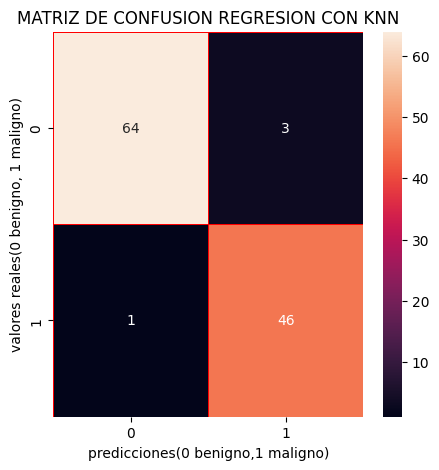

0.9649122807017544


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

cm= confusion_matrix(y_test,y_pred_rf) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones(0 benigno,1 maligno)")
plt.ylabel("valores reales(0 benigno, 1 maligno)")
plt.title("MATRIZ DE CONFUSION REGRESION CON KNN")
plt.show()

print(accuracy_score(y_test, y_pred_rf))


## Ensemble methods

In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,1,1],
       flatten_transform=True)
eclf3 = eclf3.fit(X, y)

print(eclf3.predict(X))
print(eclf3.transform(X).shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 1 

c:\Users\ralphy.nunezmercado\Documents\Directorio\InteligenciaArtificial\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
